In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import itertools

In [2]:

data_path="archive (55)/train"
data_list=os.listdir(data_path)
img_data=[]
for dataset in data_list:
    img_list=os.listdir(data_path+'/'+dataset)
    print(dataset)
    for img in img_list:
        input_img=cv2.imread(data_path+'/'+dataset+'/'+img)
        input_img_resized=cv2.resize(input_img,(48,48))
        img_data.append(input_img_resized)

data=np.array(img_data)
data=data.astype('float32')
data=data/255.0
data.shape



angry
disgust
fear
happy
neutral
sad
surprise


(28709, 48, 48, 3)

## **Adding labels to images**

In [3]:
from sklearn.utils import shuffle
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

num_class=len(data_list)
num_samples=data.shape[0]

#one hot vector
labels=np.ones((num_samples,),dtype='int64')
labels[0:3995]=0 #anger
labels[3995:4431]=1 #disgust
labels[4431:8528]=2 #fear
labels[8528:15743]=3 #happy
labels[15743:20708]=4 #neutral
labels[20708:25538]=5 #sad
labels[25538:28709]=6 #surprise

names=data_list
img_label=to_categorical(labels,num_class)

## **Shuffling the data**

In [4]:
x,y=shuffle(data,img_label,random_state=42)

## **Splitting data to train and test**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **Displaying some images**

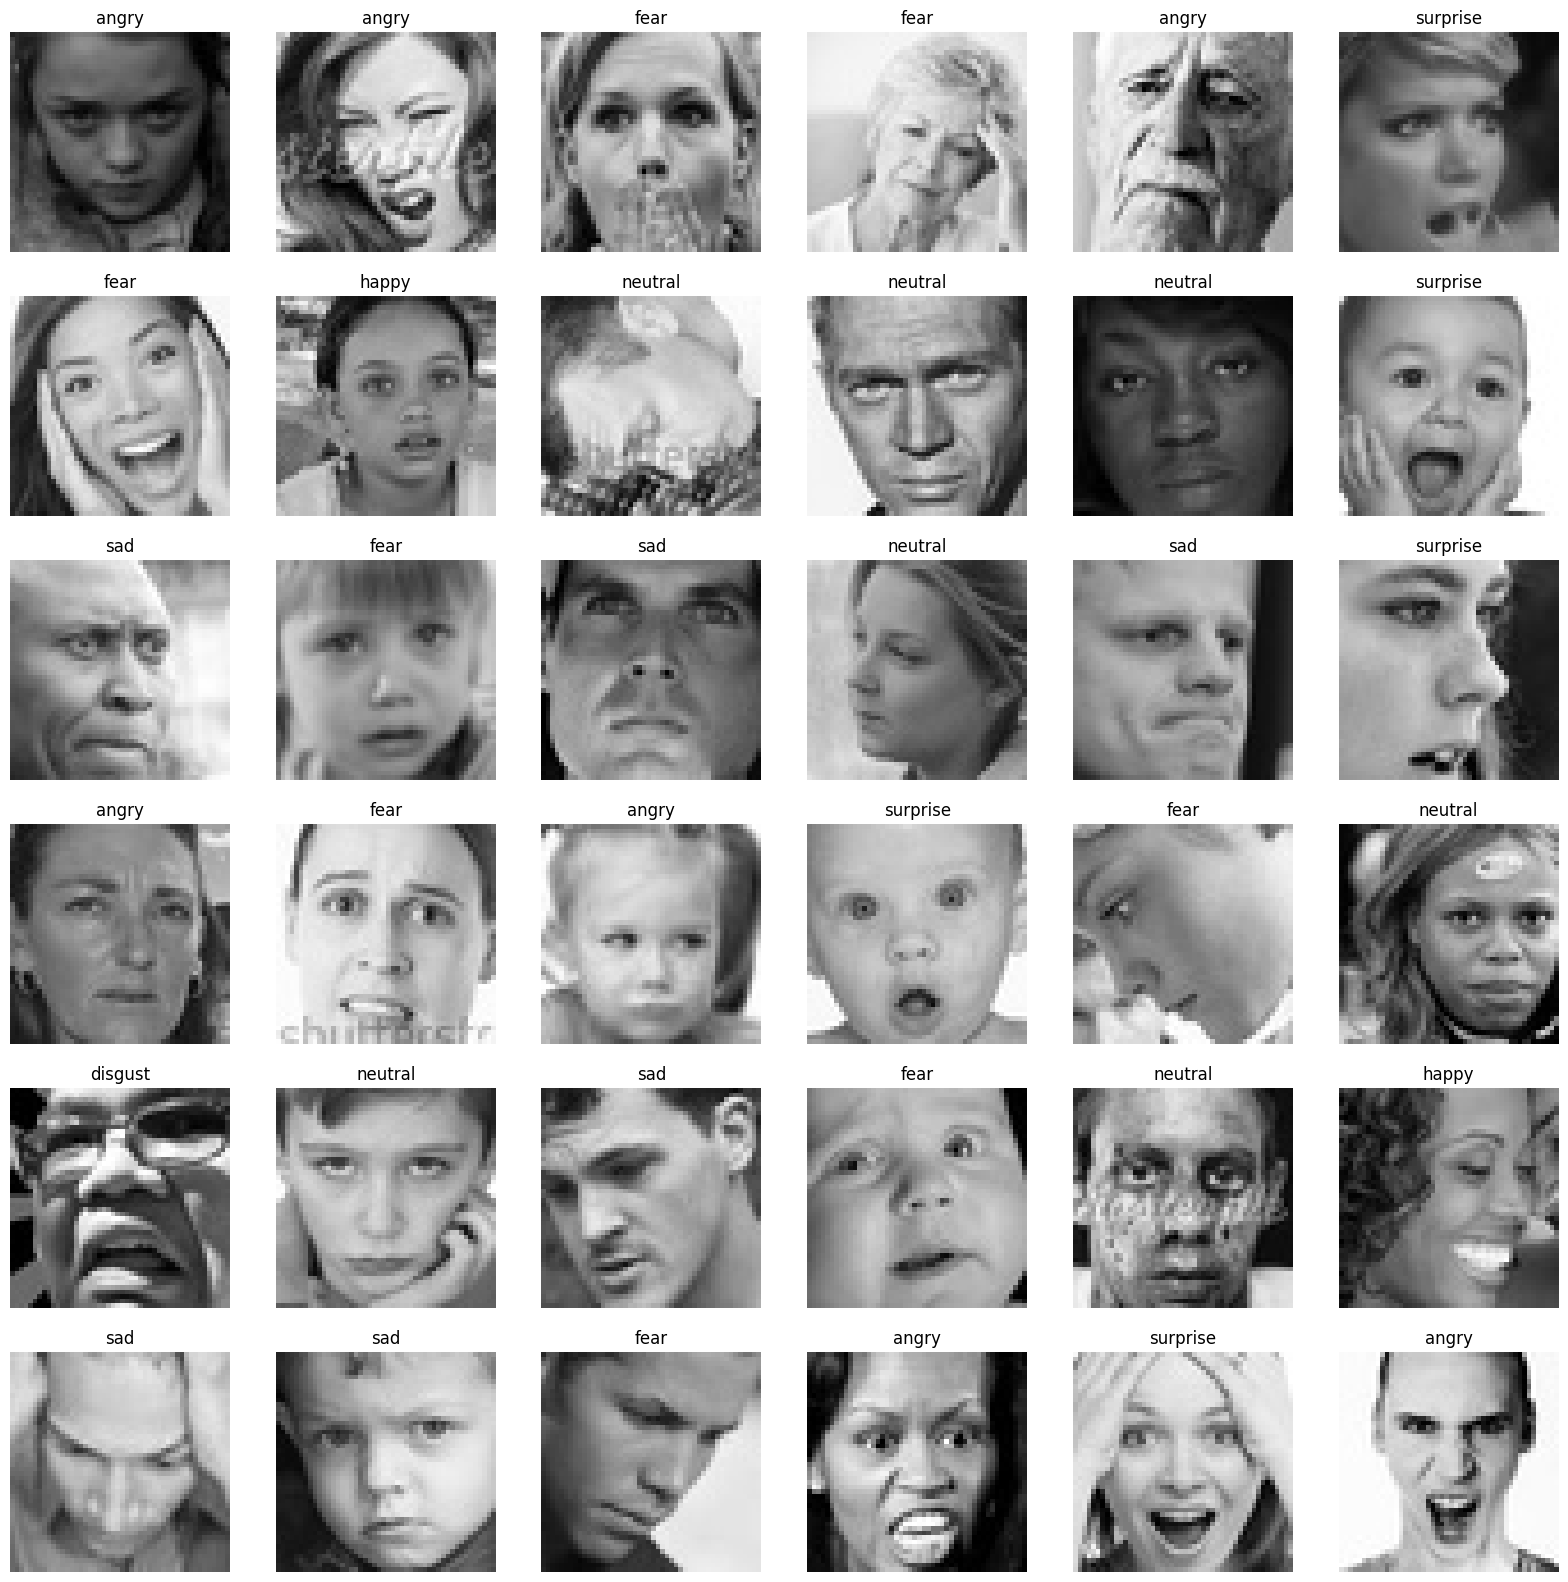

In [6]:
plt.figure(figsize=(20,20))
for i,j in enumerate(list(np.random.randint(0,len(x),36))):
    plt.subplot(6,6,i+1)
    plt.imshow(x[j])
    plt.axis('off')
    plt.title(names[list(y[j].astype(int)).index(1)])

## **Training Model**

In [7]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3), padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),  
    Dense(128, activation='relu'),
    Dropout(0.5), 

    Dense(7, activation='softmax')  
])


C:\Users\Toka Khaled\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,359 (2.61 MB)

 Trainable params: 684,359 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.2317 - loss: 1.8389 - val_accuracy: 0.2663 - val_loss: 1.7874
Epoch 2/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.2589 - loss: 1.7914 - val_accuracy: 0.3507 - val_loss: 1.6399
Epoch 3/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.3686 - loss: 1.6102 - val_accuracy: 0.4312 - val_loss: 1.4614
Epoch 4/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.4244 - loss: 1.4724 - val_accuracy: 0.4742 - val_loss: 1.3453
Epoch 5/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.4695 - loss: 1.3710 - val_accuracy: 0.4894 - val_loss: 1.2956
Epoch 6/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.5060 - loss: 1.2727 - val_accuracy: 0.5146 - val_loss: 1.2491
Epoch 7/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.5394 - loss: 1.2055 - val_accuracy: 0.5338 - val_loss: 1.2309
Epoch 8/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.5626 - loss: 1.1490 - 

## **Evaluating Model**

In [11]:
loss,accuracy=model.evaluate(X_test,y_test)

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5422 - loss: 1.2121


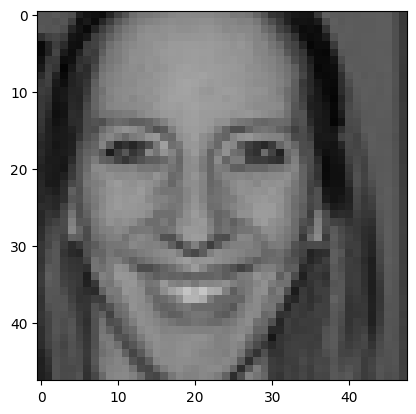

In [12]:
plt.imshow(X_test[0])


In [13]:
y_pred = model.predict(X_test[0:1])

predicted_index = np.argmax(y_pred)

predicted_name = names[predicted_index]

print(predicted_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
happy


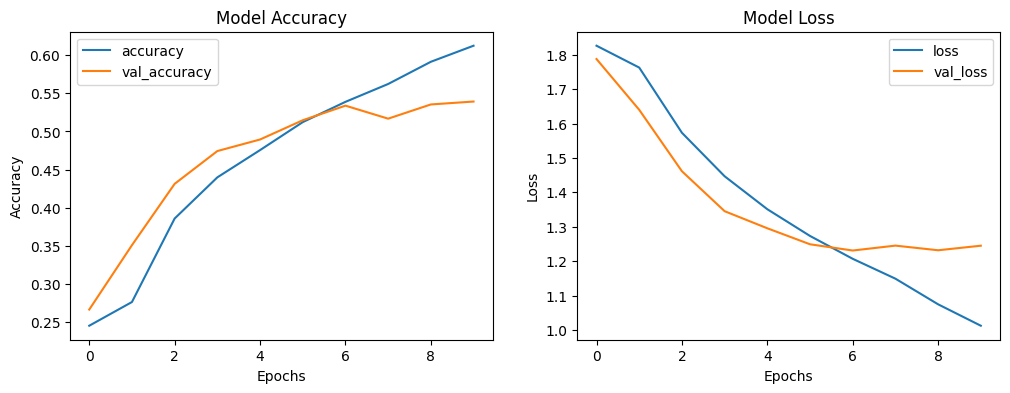

In [14]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **Saving model**

In [15]:
model.save('emotion_recognition_model.h5')

In [16]:
from tensorflow.keras.models import load_model
model = load_model('emotion_recognition_model.h5')